# Breast Cancer Prediction Using Decision Trees

In [2]:
# import necessary libraries
from sklearn import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

## Load Data

In [3]:
# import data

data = pd.read_csv("breast-cancer.csv")
print(data.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [4]:
x_features = data.iloc[:,2:]
# print(x_features)
print(x_features.columns[22])
y_target = data["diagnosis"]
# print(y_target.head(20))
y_target = y_target.replace({"M": 1, "B": 0})
# y_target

perimeter_worst


## Split the dataset into training set, validation set and test set (ratio: 70/20/10)


In [5]:
# we split the dataset using sklearn into 70-20-10

X_train, X_test, y_train, y_test = train_test_split(
    x_features, y_target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = np.asarray(X_train), np.asarray(X_val), np.asarray(y_train), np.asarray(y_val)
X_test, y_test = np.asarray(X_test), np.asarray(y_test)

In [6]:
print(f"Training set: (X_train,y_train): {len(X_train),len(y_train)}, \nTest set: (X_test, y_test): {len(X_test), len(y_test)}")
print(f"Validation set: (X_val, y_val): {len(X_val), len(y_val)}")

Training set: (X_train,y_train): (409, 409), 
Test set: (X_test, y_test): (114, 114)
Validation set: (X_val, y_val): (46, 46)


In [7]:
#check the shape of each set

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (409, 30)
y_train shape: (409,)
X_val shape: (46, 30)
y_val shape: (46,)
X_test shape: (114, 30)
y_test shape: (114,)


## Decision Tree Model

In [8]:
X = X_train
y = y_train

# clf = classification

clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
clf = clf.fit(X, y)

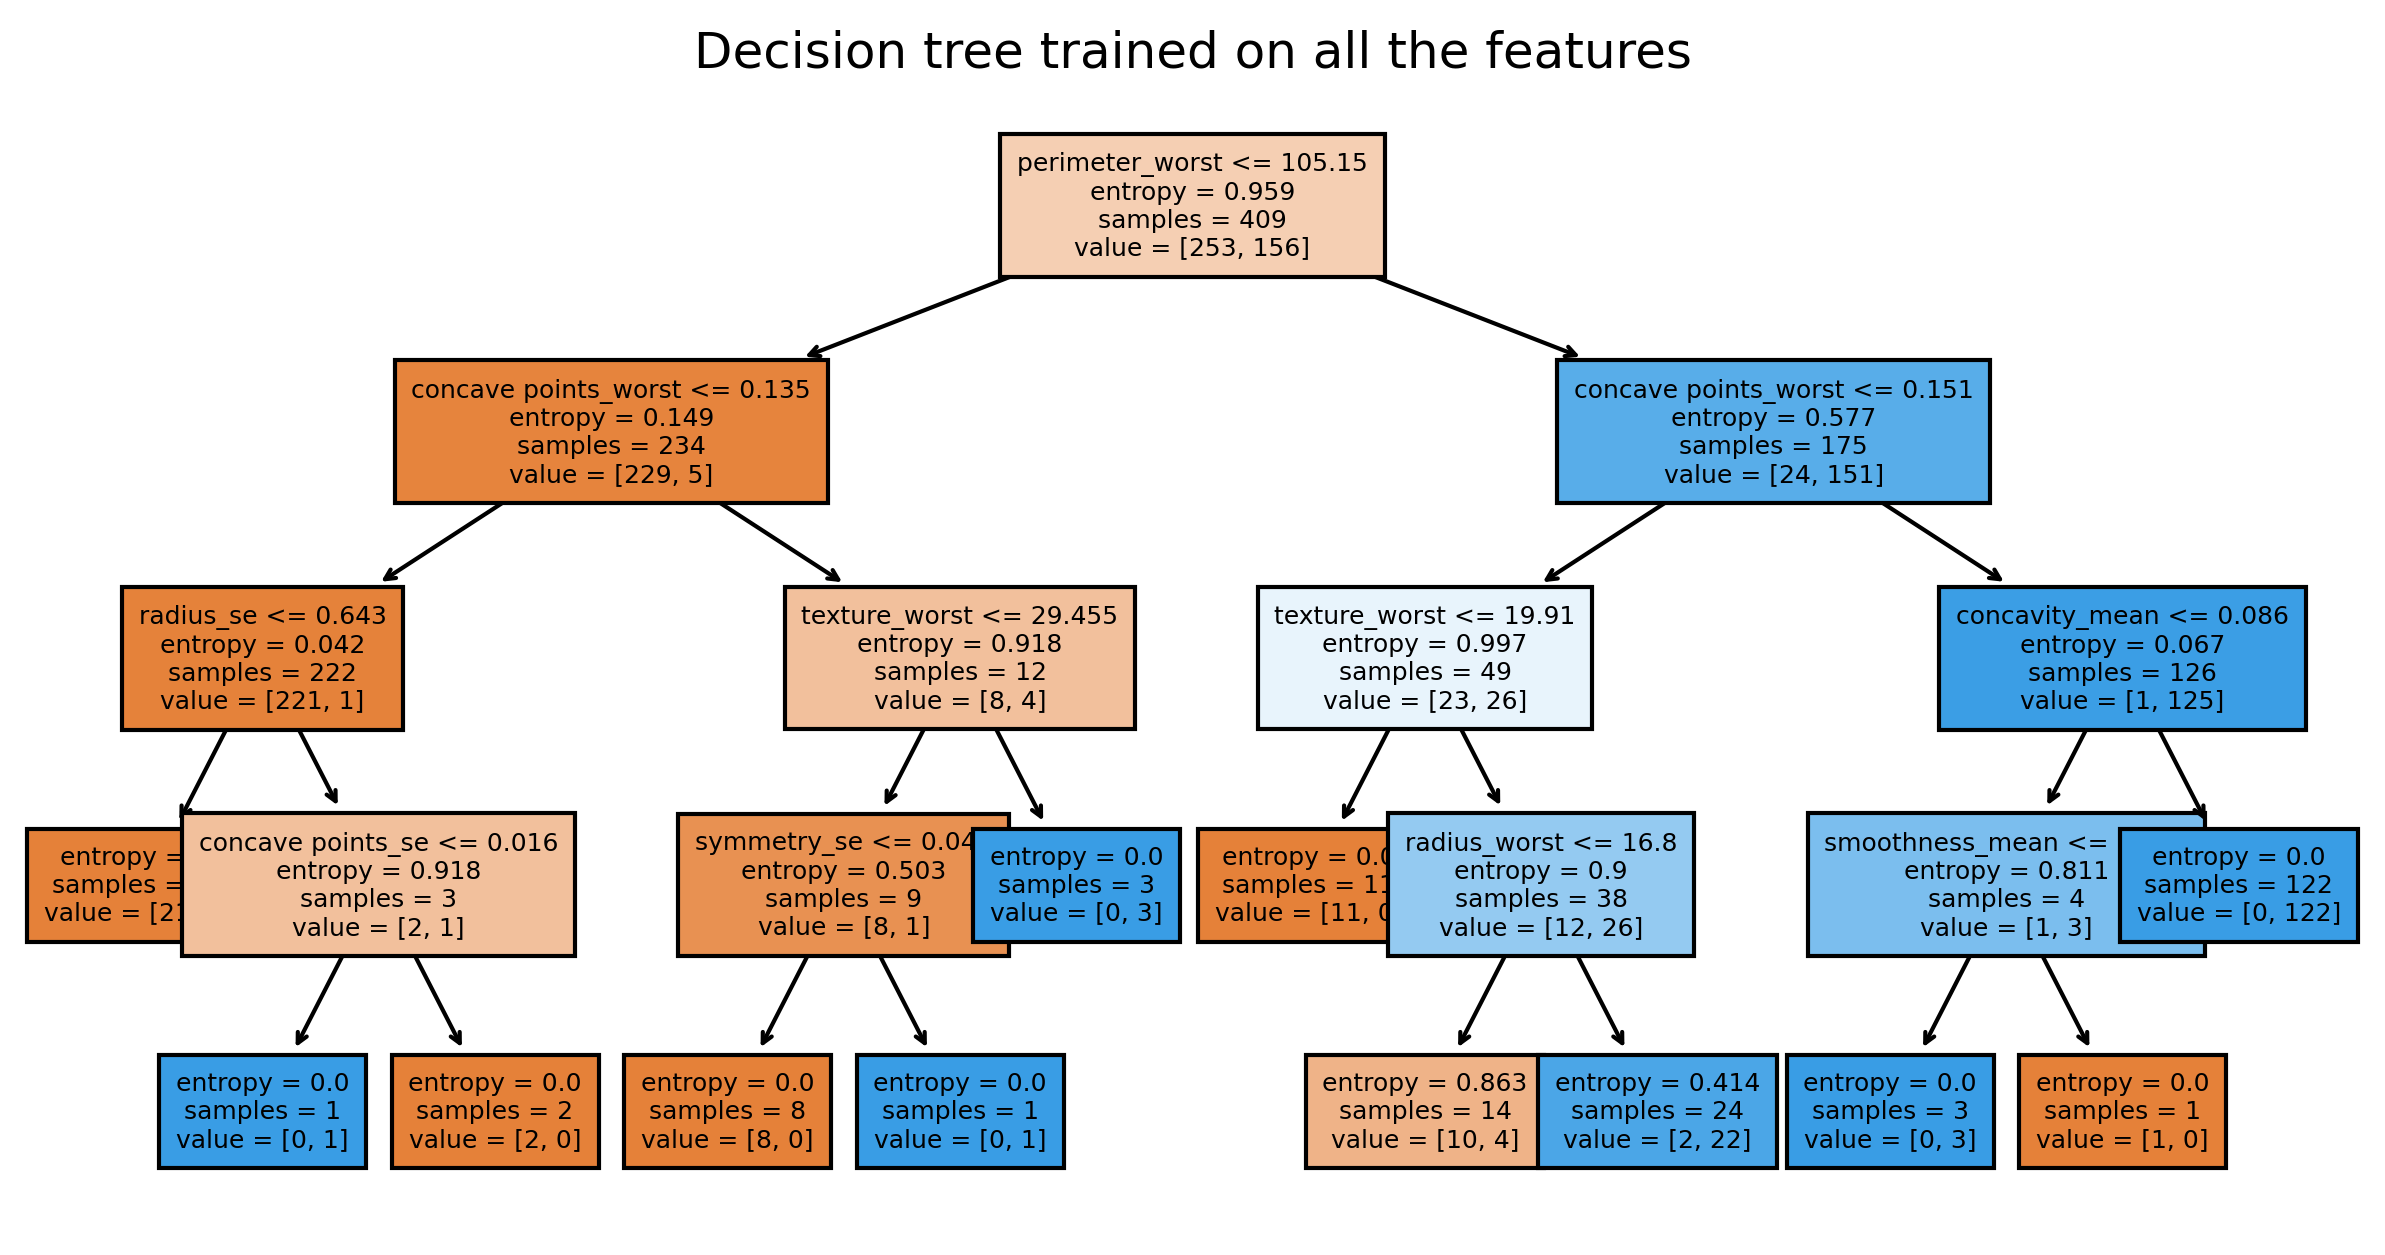

In [9]:
plt.figure(figsize=[10,5], dpi=300)
plot_tree(clf, feature_names = x_features.columns, filled=True, fontsize = 6)

plt.title("Decision tree trained on all the features")


plt.show()

In [10]:
y_predict_train = clf.predict(X_train)
print(y_predict_train)

[1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0]


In [11]:
y_predict_val = clf.predict(X_val)
print(y_predict_val)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0]


In [12]:
y_predict_test = clf.predict(X_test)
print(y_predict_test)

[0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0]


In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


precision_train = precision_score(y_train, y_predict_train)
print(f'Precision_train: {precision_train}')

recall_train = recall_score(y_train, y_predict_train)
print(f'Recall_train: {recall_train}')

accuracy_train = accuracy_score(y_train, y_predict_train)
print(f'Accuracy_train: {accuracy_train}')

f1_score_train = f1_score(y_train, y_predict_train)
print(f'F1_score: {f1_score_train}')

Precision_train: 0.987012987012987
Recall_train: 0.9743589743589743
Accuracy_train: 0.9853300733496333
F1_score: 0.9806451612903225


In [21]:
precision_val = precision_score(y_val, y_predict_val)
print(f'Precision_val: {precision_val}')

recall_val = recall_score(y_val, y_predict_val)
print(f'Recall_val: {recall_val}')

accuracy_val = accuracy_score(y_val, y_predict_val)
print(f'Accuracy_val: {accuracy_val}')

f1_score_val = f1_score(y_val, y_predict_val)
print(f'F1_score: {f1_score_val}')

Precision_val: 1.0
Recall_val: 0.7857142857142857
Accuracy_val: 0.9347826086956522
F1_score: 0.88


In [22]:
precision_test = precision_score(y_test, y_predict_test)
print(f'Precision_test: {precision_test}')

recall_test = recall_score(y_test, y_predict_test)
print(f'Recall_test: {recall_test}')

accuracy_test = accuracy_score(y_test, y_predict_test)
print(f'Accuracy_test: {accuracy_test}')

f1_score_test = f1_score(y_test, y_predict_test)
print(f'F1_score: {f1_score_test}')

Precision_test: 0.972972972972973
Recall_test: 0.8571428571428571
Accuracy_test: 0.9385964912280702
F1_score: 0.9113924050632912
